In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [4]:
# Loading the mnist data

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [5]:
type(X_train)

numpy.ndarray

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
Y_train.shape

(60000,)

In [8]:
X_test.shape

(10000, 28, 28)

In [9]:
Y_test.shape

(10000,)

Image dimension = 28 X 28.
It is a grayscale image.


In [11]:
print(X_train[10].shape)

(28, 28)


3


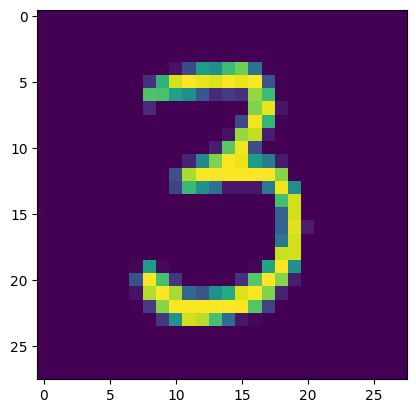

In [13]:
# displaying the image

plt.imshow(X_train[50])
print(Y_train[50])

In [15]:
# unique values in Y_train

print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [16]:
# scaling the data

X_train = X_train/255
X_test = X_test/255

In [22]:
# Building the neural network

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics='accuracy')



In [23]:
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3000 - accuracy: 0.9124
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1367 - accuracy: 0.9589
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1034 - accuracy: 0.9694
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0833 - accuracy: 0.9747
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0707 - accuracy: 0.9779
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0595 - accuracy: 0.9816
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0506 - accuracy: 0.9838
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0463 - accuracy: 0.9854
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0395 - accuracy: 0.9866
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.034

In [24]:
loss, accuracy = model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1021 - accuracy: 0.9732


In [26]:
print('Loss: ',round(loss,2))
print('Accuracy: ',round(accuracy,2))

Loss:  0.1
Accuracy:  0.97


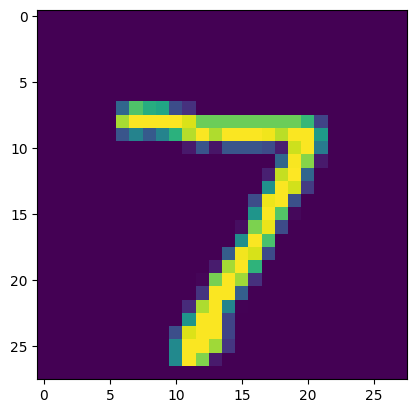

In [27]:
plt.imshow(X_test[0])

In [28]:
print(Y_test[0])

7


In [29]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [30]:
print(Y_pred[0])

[3.8711871e-05 1.2097591e-01 4.9424809e-01 9.2648137e-01 4.6466925e-04
 2.4329415e-02 4.8107729e-08 9.9999762e-01 7.5898846e-03 2.9250293e-03]


In [31]:
index = np.argmax(Y_pred[0])

In [32]:
index

7

In [33]:
# converting these labels to index for the whole data

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [34]:
print(Y_test)

[7 2 1 ... 4 5 6]


In [37]:
conf_matrix = confusion_matrix(Y_test, Y_pred_labels)
conf_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    2,    1,    2,    6,    5,    2,    2,    1],
       [   0, 1123,    4,    1,    0,    1,    2,    1,    3,    0],
       [   4,    1, 1005,    2,    2,    2,    3,    6,    7,    0],
       [   0,    0,   10,  966,    1,   12,    0,    9,    5,    7],
       [   0,    0,    2,    1,  971,    0,    2,    0,    0,    6],
       [   1,    0,    0,    5,    1,  875,    4,    1,    2,    3],
       [   1,    2,    2,    1,    5,    9,  936,    0,    2,    0],
       [   0,    3,    7,    1,    1,    0,    0, 1007,    2,    7],
       [   6,    0,    4,    8,    6,   13,    1,    5,  927,    4],
       [   2,    3,    1,    5,   21,    2,    0,    9,    3,  963]],
      dtype=int32)>

<Axes: >

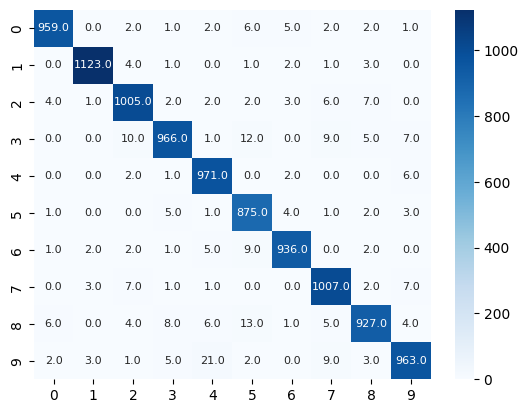

In [39]:
sns.heatmap(conf_matrix, cbar=True, annot=True, fmt='.1f', annot_kws={'size':8}, cmap='Blues')

In [40]:
# Building predictive system

!wget 'https://www.netflix.com/tudum/top10/images/big_numbers/3.png'

--2023-09-24 09:01:22--  https://www.netflix.com/tudum/top10/images/big_numbers/3.png
Resolving www.netflix.com (www.netflix.com)... 44.237.234.25, 44.234.232.238, 44.242.60.85, ...
Connecting to www.netflix.com (www.netflix.com)|44.237.234.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4906 (4.8K) [image/png]
Saving to: ‘3.png’

3.png               100%[===================>]   4.79K  --.-KB/s    in 0s      

2023-09-24 09:01:23 (803 MB/s) - ‘3.png’ saved [4906/4906]



In [41]:
image = cv2.imread('/content/3.png')

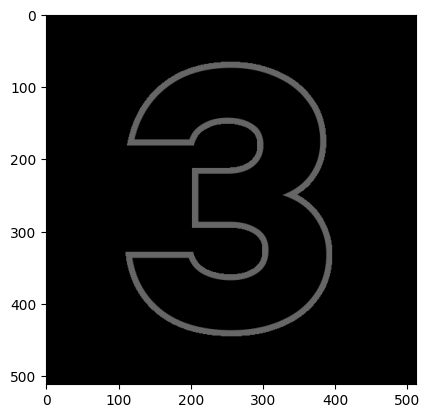

In [42]:
plt.imshow(image)

In [44]:
image.shape

(512, 512, 3)

In [47]:
from cv2.gapi import RGB2Gray
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

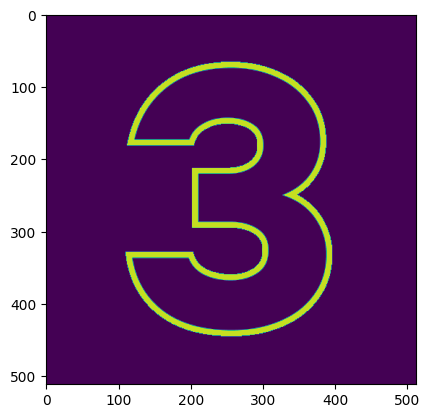

In [49]:
plt.imshow(image_gray)

In [50]:
image_gray.shape

(512, 512)

In [52]:
image_gray_resize = cv2.resize(image_gray, (28,28))

In [53]:
image_gray_resize.shape

(28, 28)

In [55]:
image_gray_resize = image_gray_resize/255

In [56]:
image_gray_resize = np.reshape(image_gray_resize, [1,28,28])

In [57]:
Y_prediction = model.predict(image_gray_resize)
Y_prediction

1/1 [==============================] - 0s 21ms/step


array([[0.08845529, 0.4147944 , 0.42557177, 0.25274044, 0.68346316,
        0.55760837, 0.2386451 , 0.31881097, 0.44706324, 0.09227591]],
      dtype=float32)

In [58]:
Y = np.argmax(Y_prediction)

In [59]:
Y

4